# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [34]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import random

In [190]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")
# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

## Load Data

In [36]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [37]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
#We will also drop the columns which are not the dwelling types
dwellings_per_year = to_data.groupby("year").sum().drop(columns=["average_house_value", "shelter_costs_owned", "shelter_costs_rented" ])

dwellings_per_year

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


In [38]:
# Save the dataframe as a csv file
dwellings_per_year.to_csv("Data/dwelling_types_per_year.csv")

In [49]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    Input: 
    data = DataFrame to use for plotting the data
    title = Chart Title
    xlabel = Label for X Axis
    ylabel = Label for Y Axis
    color = Colour of the bar chart

    """
    data.plot(kind="bar", xlabel=xlabel, ylabel=ylabel, color=color, title=title)
    
    #We want to show the plot after plotting it, if we dont do this, it will overwrite the previously plotted bar chart.
    plt.show()

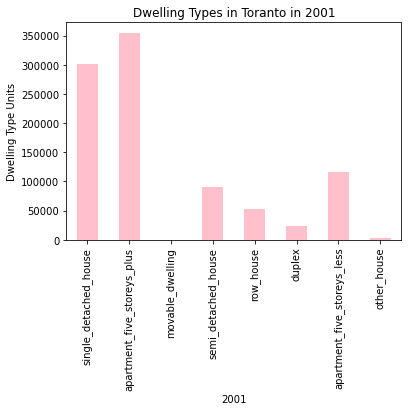

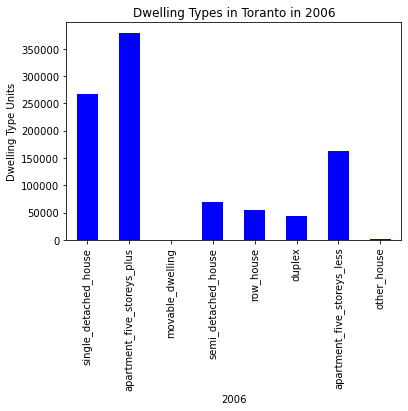

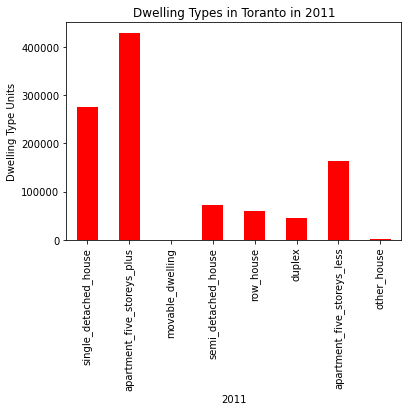

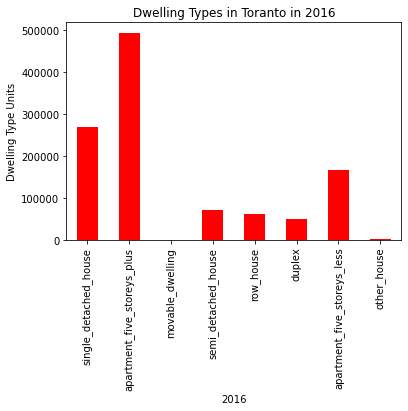

In [57]:
# Create a bar chart per year to show the number of dwelling types
colors = ["red", "pink", "blue", "yellow"]

#We will use a for loop to do charts for each year rather than repeating the code and we will use a random color from the colors list.
for index in dwellings_per_year.index:
    title = "Dwelling Types in Toranto in " + str(index)
    ylabel = "Dwelling Type Units"
    create_bar_chart(dwellings_per_year.loc[index], title=title, xlabel=index, ylabel=ylabel, color=random.choice(colors))




- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [66]:
# Calculate the average monthly shelter costs for owned and rented dwellings
#We will also drop the columns which are not the dwelling types
#dwellings_per_year = to_data[[]].groupby("year").mean().drop(columns=["average_house_value", "shelter_costs_owned", "shelter_costs_rented" ])

monthly_shelter_cost_per_year = to_data[["shelter_costs_owned","shelter_costs_rented"]].groupby("year").mean()
monthly_shelter_cost_per_year

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


In [69]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.

    Input: 
    data = DataFrame to use for plotting the data
    title = Chart Title
    xlabel = Label for X Axis
    ylabel = Label for Y Axis
    color = Colour of the bar chart

    """
    data.plot(kind="line", xlabel=xlabel, ylabel=ylabel, color=color, title=title)
    
    #We want to show the plot after plotting it, if we dont do this, it will overwrite the previously plotted bar chart.
    plt.show()

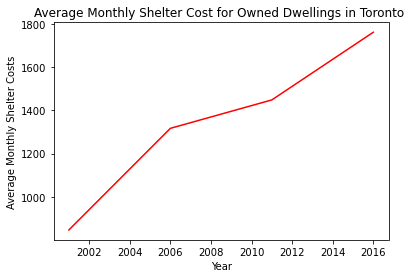

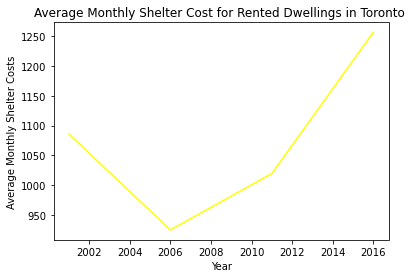

In [75]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings

create_line_chart(data=monthly_shelter_cost_per_year["shelter_costs_owned"], title="Average Monthly Shelter Cost for Owned Dwellings in Toronto ", 
                  xlabel="Year", ylabel="Average Monthly Shelter Costs", color="red") 
# Line chart for rented dwellings
create_line_chart(data=monthly_shelter_cost_per_year["shelter_costs_rented"], title="Average Monthly Shelter Cost for Rented Dwellings in Toronto ", 
                  xlabel="Year", ylabel="Average Monthly Shelter Costs", color="yellow") 

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [78]:
# Calculate the average house value per year
average_house_value = to_data["average_house_value"].groupby("year").mean()
average_house_value

year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

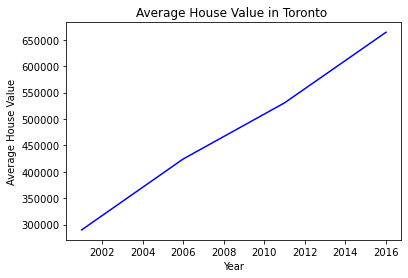

In [79]:
# Plot the average house value per year as a line chart
create_line_chart(data=average_house_value, title="Average House Value in Toronto ", 
                  xlabel="Year", ylabel="Average House Value", color="blue")

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [82]:
# Create a new DataFrame with the mean house values by neighbourhood per year
avg_house_value_by_neighbourhood = to_data[["neighbourhood","average_house_value"]].reset_index()
avg_house_value_by_neighbourhood.head(10)

,year,neighbourhood,average_house_value
0,2001,Agincourt North,200388
1,2001,Agincourt South-Malvern West,203047
2,2001,Alderwood,259998
3,2001,Annex,453850
4,2001,Banbury-Don Mills,371864
5,2001,Bathurst Manor,304749
6,2001,Bay Street Corridor,257404
7,2001,Bayview Village,327644
8,2001,Bayview Woods-Steeles,343535
9,2001,Bedford Park-Nortown,565304


In [86]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
avg_house_value_by_neighbourhood.hvplot.line(x="year", y="average_house_value", xlabel="Year", ylabel="Average House Value", groupby="neighbourhood")

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [95]:
# Fetch the data of all dwelling types per year
dwelling_types_per_year = to_data.drop(columns=["average_house_value", "shelter_costs_owned", "shelter_costs_rented" ])
dwelling_types_per_year.head(10)

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0
2001,Alderwood,3175,315,0,470,50,185,370,0
2001,Annex,1060,6090,5,1980,605,275,3710,165
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0
2001,Bathurst Manor,2405,1550,0,130,130,375,745,0
2001,Bay Street Corridor,10,7575,0,0,15,0,240,0
2001,Bayview Village,2170,630,0,170,765,15,640,0
2001,Bayview Woods-Steeles,1650,1715,0,925,105,10,170,5


In [129]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood

dwelling_types_per_year.hvplot.bar(groupby="neighbourhood",rot=90, ylabel="Dwelling Type Units", xlabel="Year", height=500)

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [108]:
# Getting the data from the top 10 expensive neighbourhoods
ten_expensive_neighbourhoods = to_data.groupby("neighbourhood").mean().sort_values(by="average_house_value", ascending=False).reset_index()
ten_expensive_neighbourhoods.head(10)

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Bridle Path-Sunnybrook-York Mills,2260.00,331.25,0.00,36.25,90.00,25.0,40.00,0.00,1526485.75,2360.75,2321.75
1,Forest Hill South,1742.50,2031.25,1.25,61.25,45.00,75.0,1027.50,3.75,1195992.50,1781.00,1313.75
2,Lawrence Park South,3472.50,773.75,0.00,126.25,38.75,225.0,966.25,16.25,1094027.75,1954.00,1372.75
3,Rosedale-Moore Park,2498.75,4641.25,0.00,486.25,245.00,327.5,1618.75,2.50,1093640.00,1909.75,1537.25
4,St.Andrew-Windfields,3225.00,1670.00,0.00,185.00,552.50,97.5,586.25,5.00,999107.00,1880.25,1384.50
5,Casa Loma,916.25,2310.00,0.00,288.75,201.25,162.5,1192.50,2.50,981064.25,1873.75,1547.75
6,Bedford Park-Nortown,4865.00,1981.25,0.00,43.75,57.50,287.5,1275.00,88.75,930415.25,1786.75,1255.00
7,Forest Hill North,1488.75,3392.50,0.00,12.50,16.25,82.5,402.50,1.25,851680.50,1722.75,1245.50
8,Kingsway South,2326.25,576.25,0.00,66.25,48.75,20.0,336.25,2.50,843234.25,1736.75,1622.00
9,Yonge-St.Clair,565.00,3948.75,0.00,425.00,212.50,172.5,1308.75,6.25,813220.25,1680.75,1369.00


In [131]:
# Plotting the data from the top 10 expensive neighbourhoods
ten_expensive_neighbourhoods.head(10).hvplot.bar(rot=90, ylabel="Average House Value", xlabel="Neighbourhood", y="average_house_value", x="neighbourhood",height=500)
#ten_expensive_neighbourhoods[["average_house_value","shelter_costs_rented"]]

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [179]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718
...,...,...,...
135,Wychwood,43.676919,-79.425515
136,Yonge-Eglinton,43.704689,-79.403590
137,Yonge-St.Clair,43.687859,-79.397871
138,York University Heights,43.765736,-79.488883


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [178]:
# Calculate the mean values for each neighborhood
mean_data_neighbourhoods = to_data.groupby("neighbourhood").mean().reset_index()
mean_data_neighbourhoods.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
1,Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
2,Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
3,Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
4,Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


In [185]:
#Set the index to neighbourhood so we join without any errors or inaccuracies
mean_data_neighbourhoods.set_index(keys="neighbourhood",inplace=True)
df_neighbourhood_locations.set_index(keys="neighbourhood",inplace=True)

In [186]:
# Join the average values with the neighbourhood locations
neighbourhood_with_location = pd.concat([mean_data_neighbourhoods, df_neighbourhood_locations ], join="inner", axis="columns")
neighbourhood_with_location

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented,lat,lon
neighbourhood,,,,,,,,,,,,,
Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.50,1109.00,983.50,43.805441,-79.266712
Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.00,1131.25,985.00,43.788658,-79.265612
Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.50,1166.75,1003.25,43.604937,-79.541611
Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.00,1692.75,1315.25,43.671585,-79.404001
Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.00,1463.50,1242.75,43.737657,-79.349718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wychwood,1056.25,1236.25,0.00,992.50,298.75,325.00,1878.75,17.50,565976.50,1390.75,1017.25,43.676919,-79.425515
Yonge-Eglinton,1468.75,1638.75,0.00,470.00,33.75,328.75,1385.00,6.25,809745.75,1799.50,1347.75,43.704689,-79.403590
Yonge-St.Clair,565.00,3948.75,0.00,425.00,212.50,172.50,1308.75,6.25,813220.25,1680.75,1369.00,43.687859,-79.397871


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

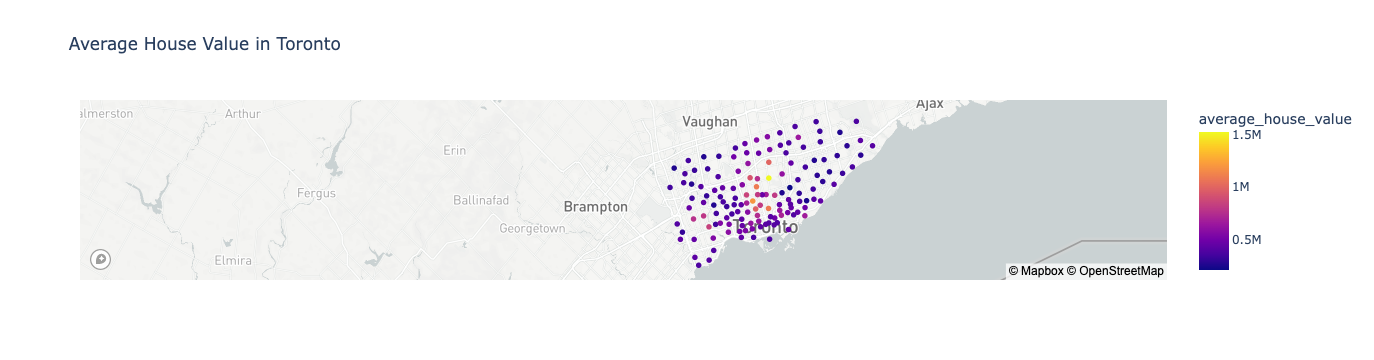

In [196]:
# Create a scatter mapbox to analyze neighbourhood info
avg_house_value_map= px.scatter_mapbox(
    neighbourhood_with_location,
    lat="lat",
    lon="lon",
color="average_house_value", title="Average House Value in Toronto"
)
avg_house_value_map.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [200]:
mean_data_neighbourhoods.reset_index(inplace=True)

In [203]:
to_data

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,Wychwood,920,1295,0,880,290,395,2080,35,787760,1864,1146
2016,Yonge-Eglinton,1400,1995,0,465,60,310,1445,0,1127052,2398,1535
2016,Yonge-St.Clair,520,4315,0,450,220,130,1370,0,1131888,2192,1619


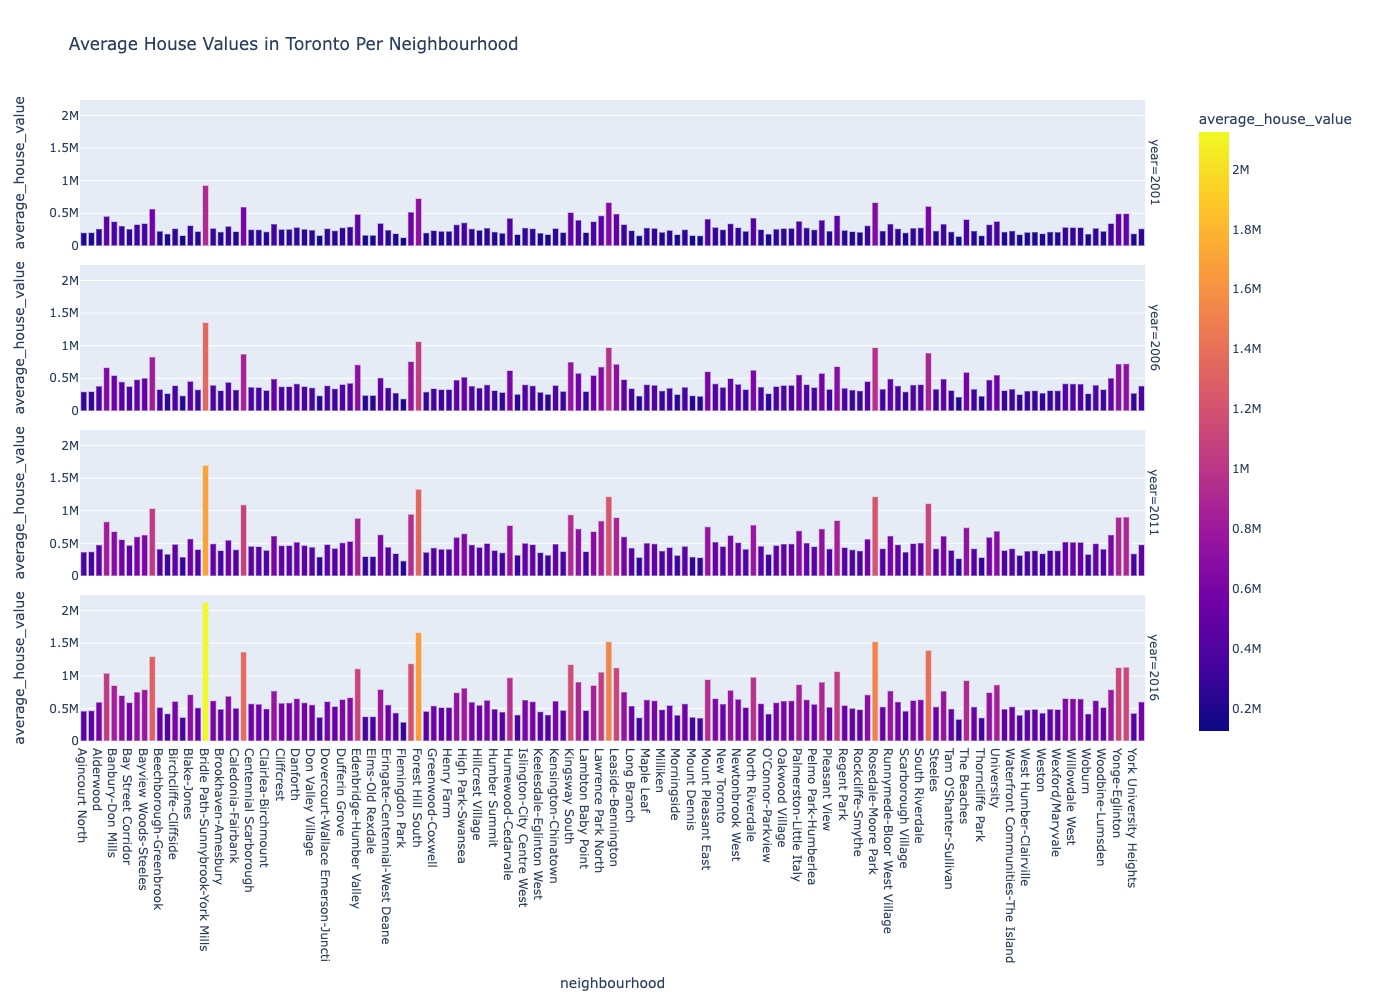

In [216]:
px.bar(to_data, x="neighbourhood", y="average_house_value",color="average_house_value", facet_row=to_data.index,height=1000, title="Average House Values in Toronto Per Neighbourhood" )

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [229]:
# Fetch the data from all expensive neighbourhoods per year.
ten_most_expensive_neighbourhoods_per_year = to_data.sort_values(by="average_house_value", ascending=False).groupby('year').head(10)
ten_most_expensive_neighbourhoods_per_year

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2016,Bridle Path-Sunnybrook-York Mills,2275,590,0,40,230,30,80,0,2124653,2903,2942
2011,Bridle Path-Sunnybrook-York Mills,2285,480,0,45,100,30,50,0,1697067,2387,2388
2016,Forest Hill South,1685,2025,0,65,40,70,1050,0,1664653,2383,1486
2016,Lawrence Park South,3420,925,0,110,35,230,1015,5,1522732,2644,1515
2016,Rosedale-Moore Park,2450,4990,0,485,260,345,1505,5,1522193,2498,1809
2016,St.Andrew-Windfields,3245,1745,0,175,540,120,595,5,1390616,2516,1565
2016,Casa Loma,875,2680,0,265,200,155,1225,0,1365503,2434,1841
2006,Bridle Path-Sunnybrook-York Mills,2205,145,0,35,15,30,10,0,1356757,2170,2167
2011,Forest Hill South,1730,1825,0,65,45,75,1035,0,1329642,1959,1206


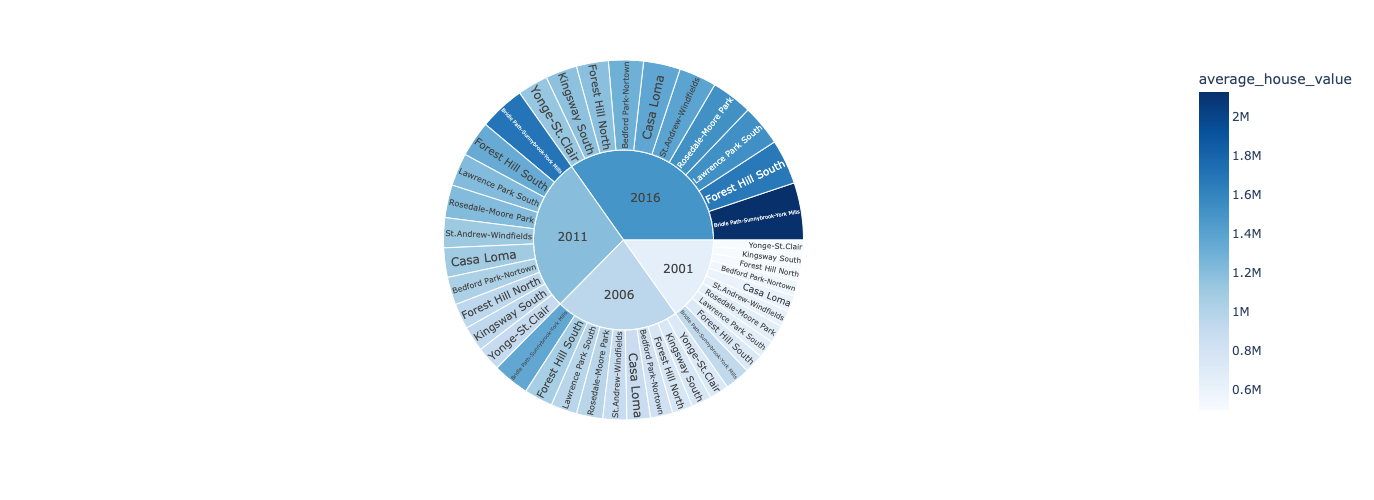

In [234]:
# Create the sunburst chart
px.sunburst(
    ten_most_expensive_neighbourhoods_per_year,
    path=[ten_most_expensive_neighbourhoods_per_year.index, 'neighbourhood'], values='average_house_value', color='average_house_value', color_continuous_scale='blues',
    height=500
    
)




